In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

IN THIS PROJECT I AM GOING TO CREATE A SIMPLE MODEL TO PREDICT CAR SALES PRICE
Dataset source:https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [43]:
df=pd.read_csv(r"C:\Users\Abdullah\Desktop\Week 4-Linear Regression ML Project\carprice.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [45]:
my_object_df=df.select_dtypes(include="object")
my_numeric_df=df.select_dtypes(exclude="object")

In [46]:
df_objects_dummies=pd.get_dummies(my_object_df,drop_first=True)

In [47]:
df=pd.concat([my_numeric_df,df_objects_dummies],axis=1)

In [48]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [49]:
data_corr=df.corr()["price"].sort_values(ascending=False)
data_corr.to_frame()
#as our target predict data is "charges" column lets see the columns correlation first

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
...,...
fuelsystem_2bbl,-0.501374
drivewheel_fwd,-0.601950
citympg,-0.685751
highwaympg,-0.697599


In [50]:
data_corr.head(15)

price                                      1.000000
enginesize                                 0.874145
curbweight                                 0.835305
horsepower                                 0.808139
carwidth                                   0.759325
carlength                                  0.682920
drivewheel_rwd                             0.638957
wheelbase                                  0.577816
boreratio                                  0.553173
fuelsystem_mpfi                            0.517075
cylindernumber_six                         0.474978
enginetype_ohcv                            0.385991
enginelocation_rear                        0.324973
CarName_buick regal sport coupe (turbo)    0.282216
cylindernumber_five                        0.249606
Name: price, dtype: float64

In [51]:
#as we see we have 3 object type column we have to convert them with using dummy variables to integers 
#but at first place lets see the distribution of numeric columns to determine if our data is eligible for linear model

<Figure size 2000x1400 with 0 Axes>

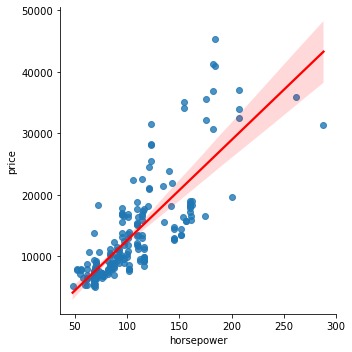

In [52]:
plt.figure(figsize=(10,7),dpi=200)

sns.lmplot(x="horsepower",y="price",data=df,line_kws={"color": "red"})


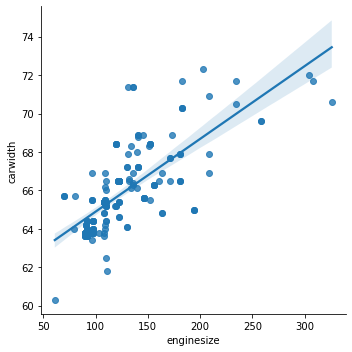

In [53]:
sns.lmplot(x="enginesize",y="carwidth",data=df)


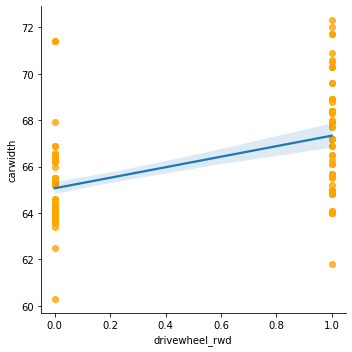

In [54]:
sns.lmplot(x="drivewheel_rwd",y="carwidth",data=df,scatter_kws={"color": "orange"})

<AxesSubplot:xlabel='price', ylabel='Density'>

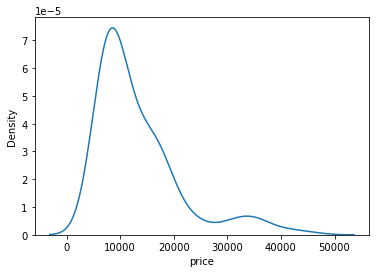

In [55]:
sns.kdeplot(data=df, x="price")
#as we see our data is good for linear regression lets check null values first

<AxesSubplot:xlabel='price', ylabel='Count'>

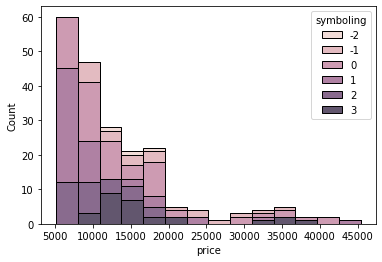

In [60]:

sns.histplot(data=df, x="price", hue="symboling", multiple="stack")


In [ ]:
df.isnull().sum()

In [ ]:
X=df[["curbweight","enginesize","horsepower","carwidth","drivewheel_rwd","wheelbase","boreratio"]]
y=df["price"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train=scaler.transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
base_elastic_net_model=ElasticNet(max_iter=10000000)

In [ ]:
param_grid={"alpha":[0.1,0.3,0.5,0.65,0.7,0.9,1,5,10,50,100],
            "l1_ratio":[.1,.5,.7,.95,.99,1]}

In [ ]:
grid_model=GridSearchCV(estimator=base_elastic_net_model,
                       param_grid=param_grid,scoring="neg_mean_squared_error",
                       cv=5,verbose=1)

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_estimator_

In [ ]:
pd.DataFrame(grid_model.cv_results_)

In [ ]:
#actually we dont have to fit grid cv because it fits the best values automatically
#we can skip to predict part directly
y_pred=grid_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
#lets evaluate these errors if they are acceptable or not
np.mean(df["price"])

In [ ]:
error_margin=100*np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(df["price"])
print("%",error_margin) 
#%20 error for margin might be acceptable for our model

In [ ]:
import joblib

In [ ]:
joblib.dump(grid_model,"week4_model.pkl")

In [ ]:
#preparing feature list for flask 
list(X.columns)

In [ ]:
joblib.dump(list(X.columns),"col_names.pkl")